# Linear regression and LASSO and Ridge


In [43]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=8, repr.plot.height=8)

In [23]:
attach(faithful)

In [24]:
 eruption.lm = lm(eruptions ~ waiting)

In [27]:
summary(eruption.lm)


Call:
lm(formula = eruptions ~ waiting)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29917 -0.37689  0.03508  0.34909  1.19329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.874016   0.160143  -11.70   <2e-16 ***
waiting      0.075628   0.002219   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4965 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


In [28]:
newdata = data.frame(waiting=80)

In [29]:
newdata

waiting
80


In [30]:
fitted = predict(eruption.lm, newdata, interval="predict") 
fitted

fit,lwr,upr
4.17622,3.196089,5.156351


In [31]:
fitted[,'fit']

[1] 4.17622

In [32]:
fitted[ ,'lwr']

[1] 3.196089

#### plot the data and the fitted line

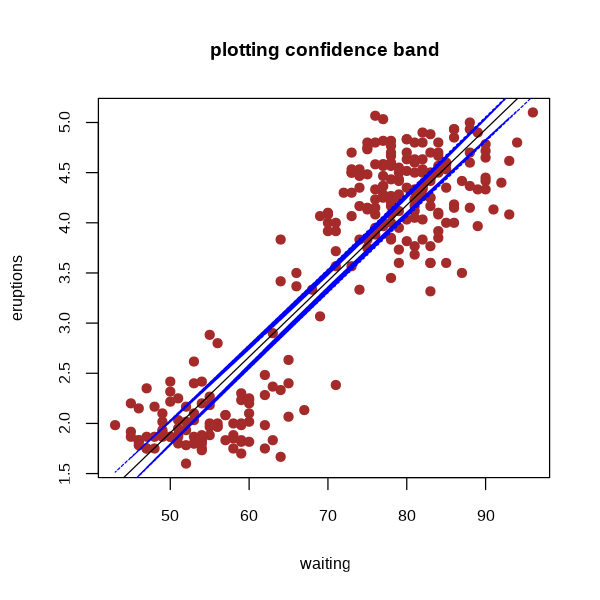

In [33]:

fitted <- predict(eruption.lm, interval = "confidence")
plot(y=eruptions,x=waiting,col='brown',pch=19,main = "plotting confidence band")
#plot confidence band
# plot the confidence bands
lines(waiting, eruption.lm$fitted.values)

lines(waiting, fitted[, "upr"], lty = "dotted",
col="blue")
lines(waiting, fitted[, "lwr"], lty = "dotted",
col="blue")




___________________________________________________________

## degree of freedom

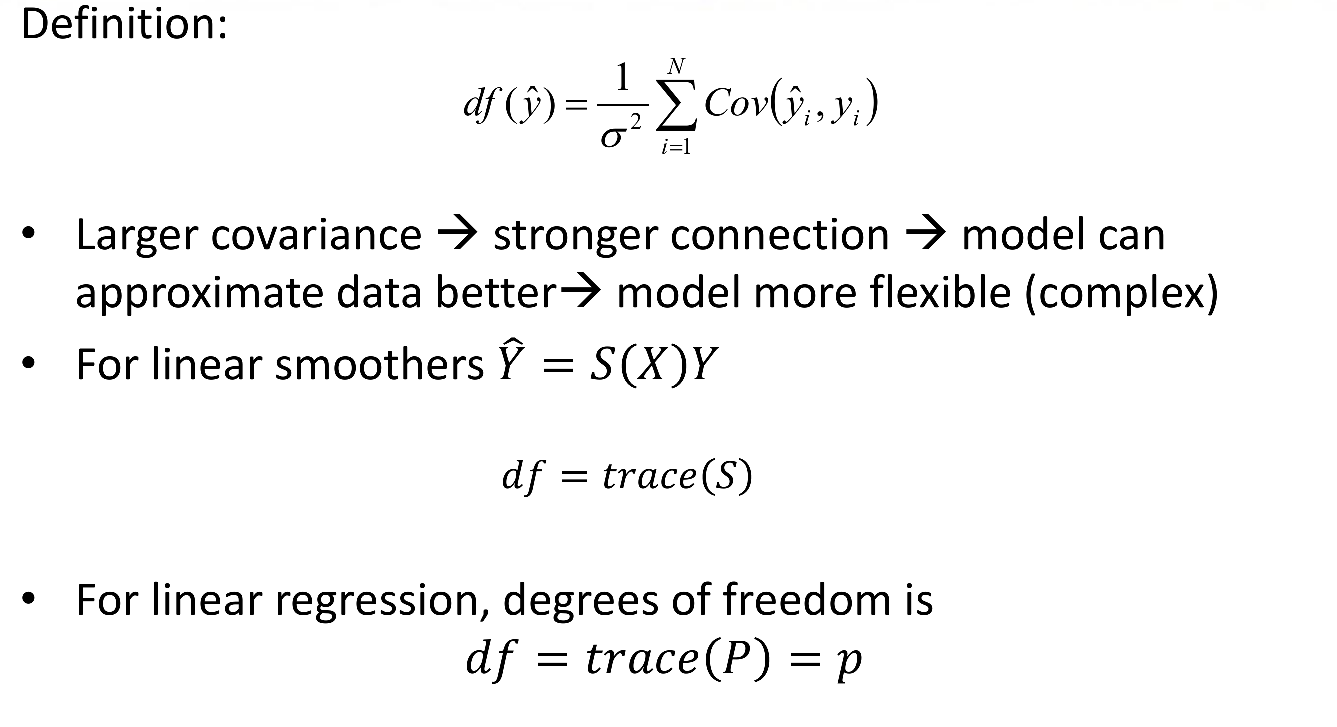

## Ridge Regression

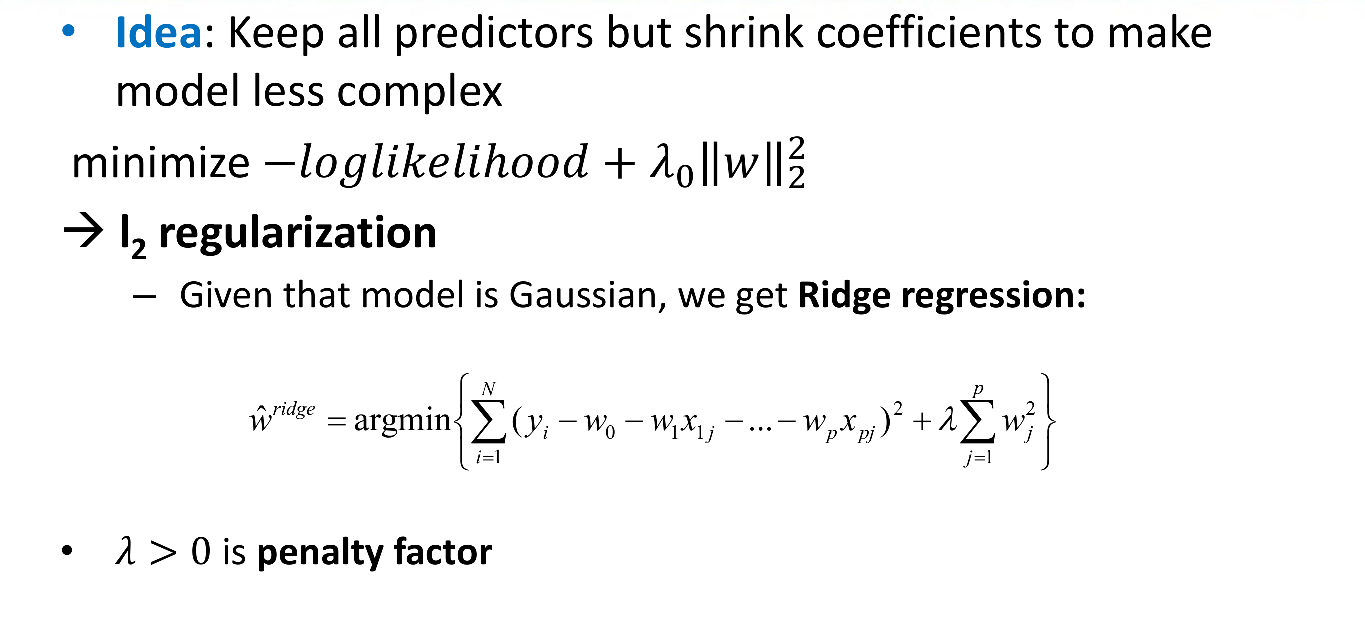

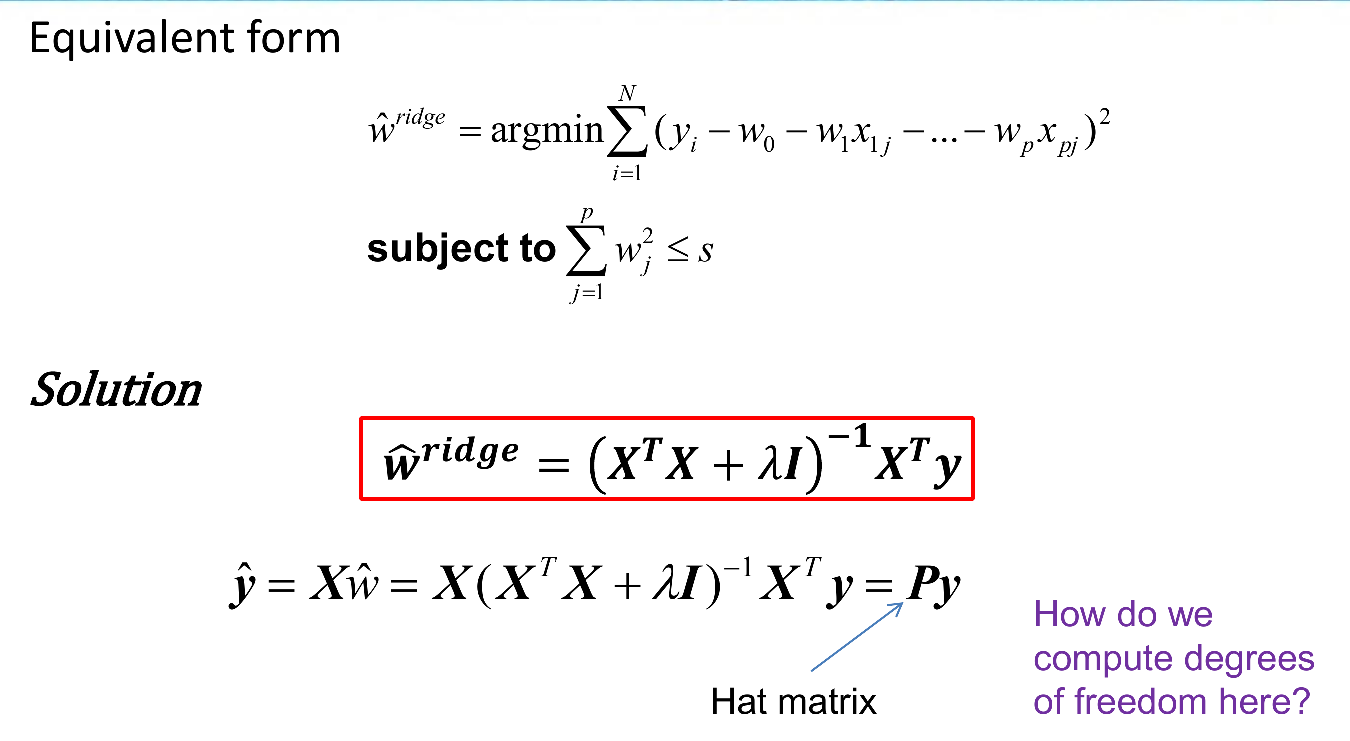

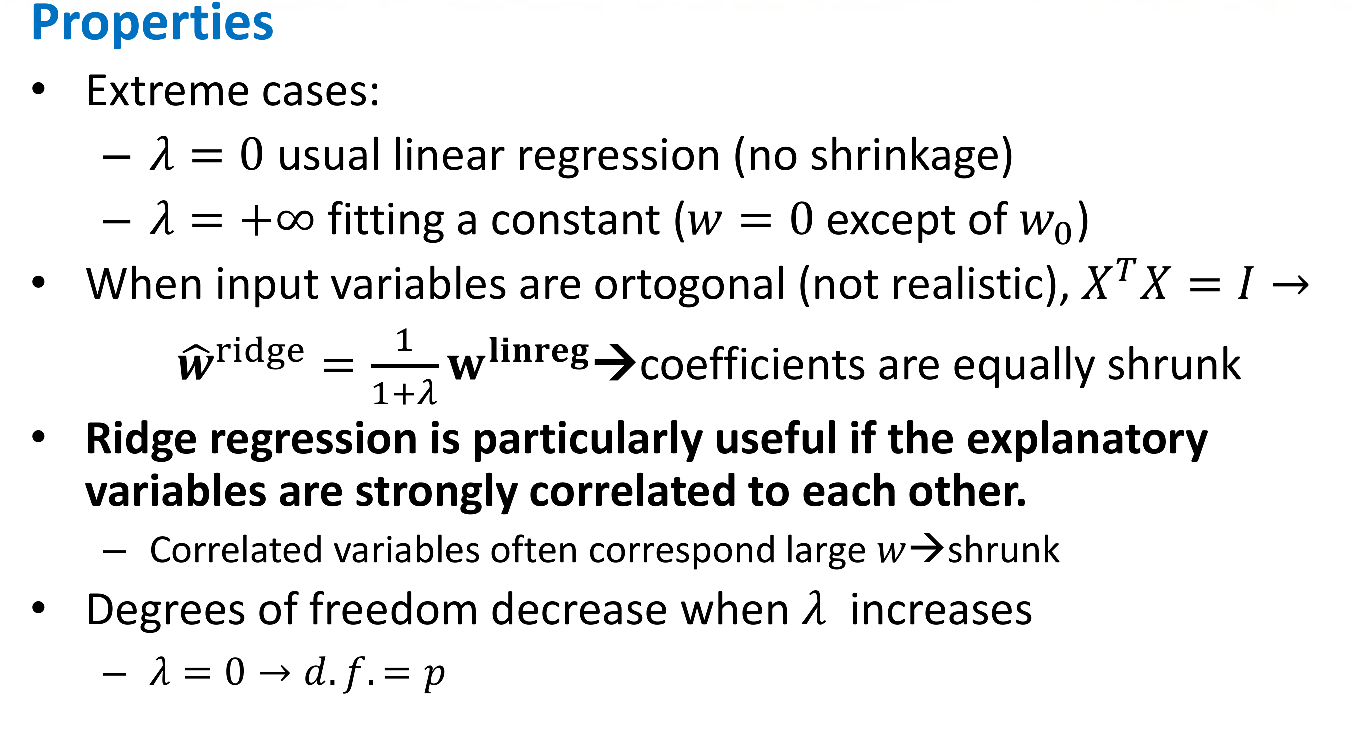

#### Ridge Regression works better than linear regression  even if (P (# featues) > n (# datapoints)).  becaues :

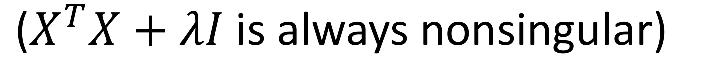

# R code: use package glmnet with alpha=0 (Ridge regression)

Seeing how Ridge converges



In [ ]:
data=read.csv("machine.csv",covariates=scale(data[,3:8])
response=scale(data[, 9])
header=F)
model0=glmnet(as.matrix(covariates),
response, alpha=0,family="gaussian")
plot(model0, xvar="lambda", label=TRUE)


# Choosing the best model by cross-validation

In [ ]:
model=cv.glmnet(as.matrix(covariates),
response, alpha=0,family="gaussian")
model$lambda.min
plot(model)
coef(model, s="lambda.min")


# How good is this model in prediction?


In [ ]:
ind=sample(209, floor(209*0.5))
data1=scale(data[,3:9])
train=data1[ind,]
test=data1[-ind,]
covariates=train[,1:6]
response=train[, 7]
model=cv.glmnet(as.matrix(covariates), response, alpha=1,family="gaussian",
lambda=seq(0,1,0.001))
y=test[,7]
ynew=predict(model, newx=as.matrix(test[, 1:6]), type="response")
#Coefficient of determination
sum((ynew-mean(y))^2)/sum((y-mean(y))^2) #if 0 underfit, if 1 overfit
sum((ynew-y)^2)


##### α=1  is lasso regression (default) and α=0 is ridge regression.

# LASSO

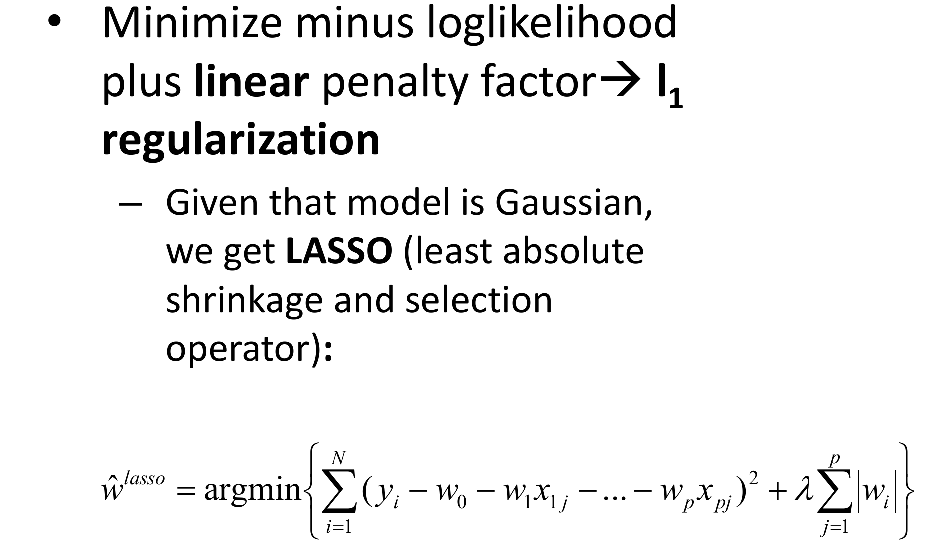
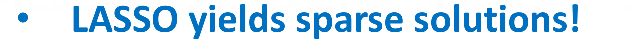
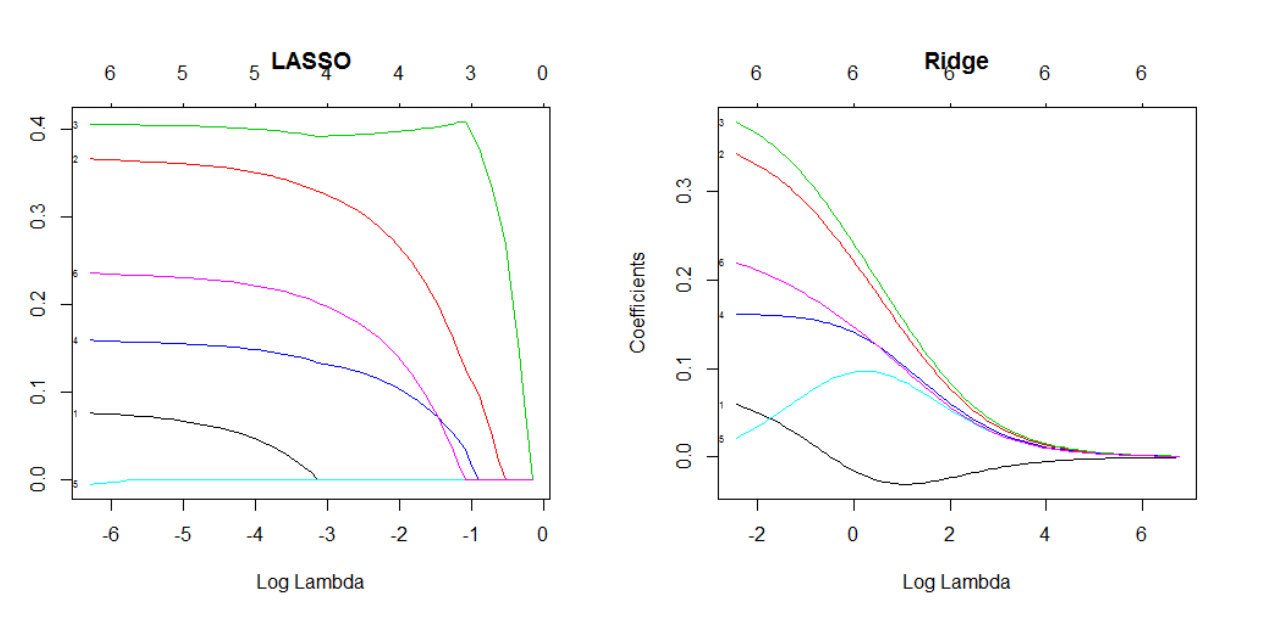

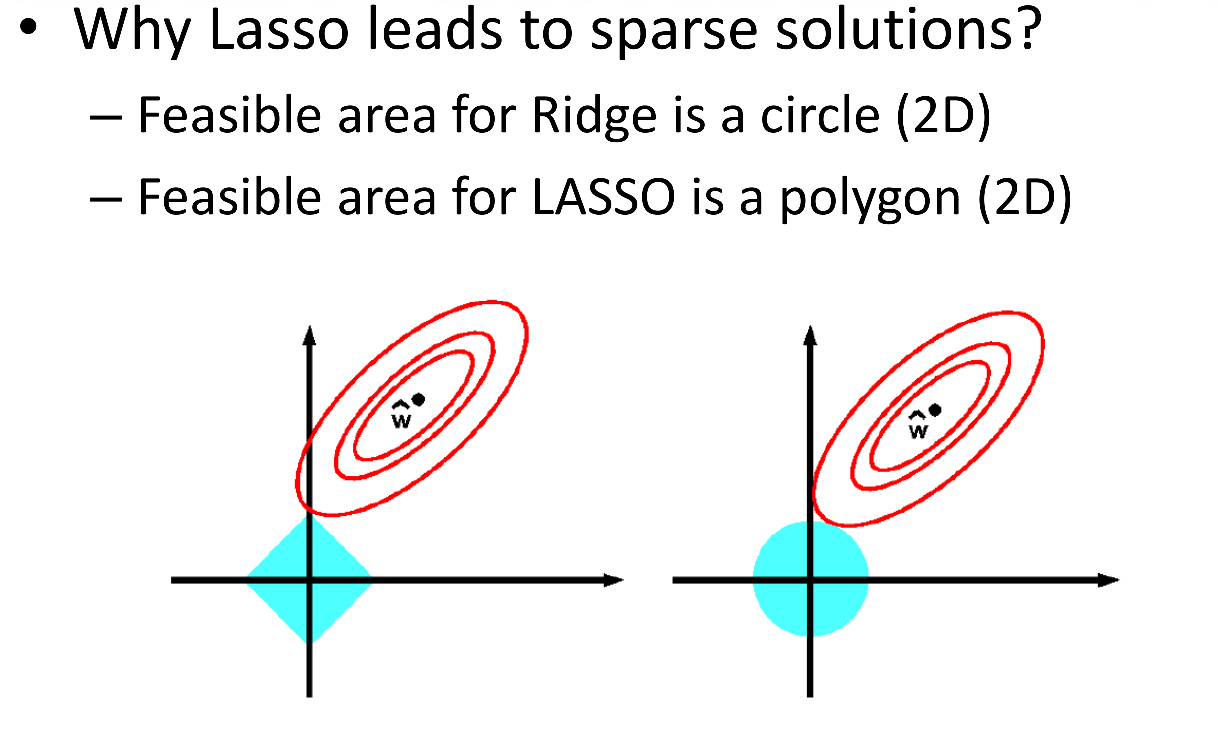

In Lasso there is a higher chance that the polygen meet the ellipsoid at one of the corners and as soon as they met at the corners then then one of the coef( w1 in the pic) will be 0.

#### Lasso  works when  (P (# featues) > > n (# datapoints)). :e.g Genome data
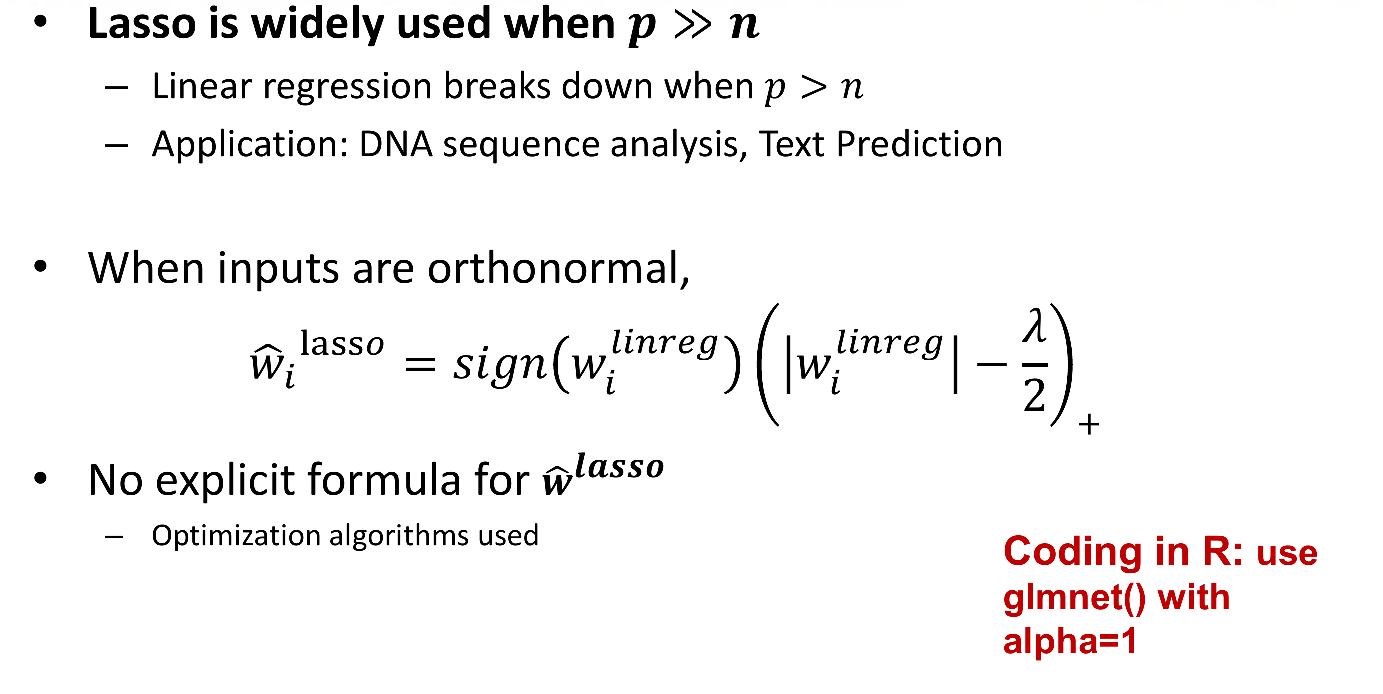

# notes on variable selection 

Often, we do not need all features available in the data to be in
the model.

Alternative 1: Variable subset selection

### • Best subset selection:

– Consider different subsets of the full set of features, fit
models and evaluate their quality

• Problem: computationally difficult for p around 30 or more

• How to choose the best model size? Some measure of predictive performance normally used (ex. AIC).

### • Forward and Backward stepwise selection

– Starts with 0 features (or full set ) and then adds a feature
(removes feature) that most improves the measure
selected.

• Can handle large p quickly
• Does not examine all possible subsets (not the “best”)



### Variable selection in R

#### Use stepAIC() in MASS


In [ ]:
library(MASS)
fit <- lm(V9~.,data=data.frame(data1))
step <- stepAIC(fit, direction="both")
step$anova
summary(step)
model.matrix(step) #list of variable


In [5]:
library(MASS)
data(mtcars)
anova(lm(mpg~disp+wt+am,mtcars),lm(mpg~disp+wt,mtcars))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,246.5563,NA,NA,NA,NA
29,246.6825,-1,-0.1262404,0.0143364,0.9055483


In [9]:
library(MASS)
res.lm <- lm(Fertility ~., data = swiss)
step <- stepAIC(res.lm, direction = "both", trace = FALSE)


In [15]:
head(swiss,1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17,15,12,9.96,22.2


In [18]:
model.matrix(step)[1:10,]  #the chosen model

,(Intercept),Agriculture,Education,Catholic,Infant.Mortality
Courtelary,1,17.0,12,9.96,22.2
Delemont,1,45.1,9,84.84,22.2
Franches-Mnt,1,39.7,5,93.40,20.2
Moutier,1,36.5,7,33.77,20.3
Neuveville,1,43.5,15,5.16,20.6
Porrentruy,1,35.3,7,90.57,26.6
Broye,1,70.2,7,92.85,23.6
Glane,1,67.8,8,97.16,24.9
Gruyere,1,53.3,7,97.67,21.0
Sarine,1,45.2,13,91.38,24.4


AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset.

# Assignment 3. Linear regression and LASSO


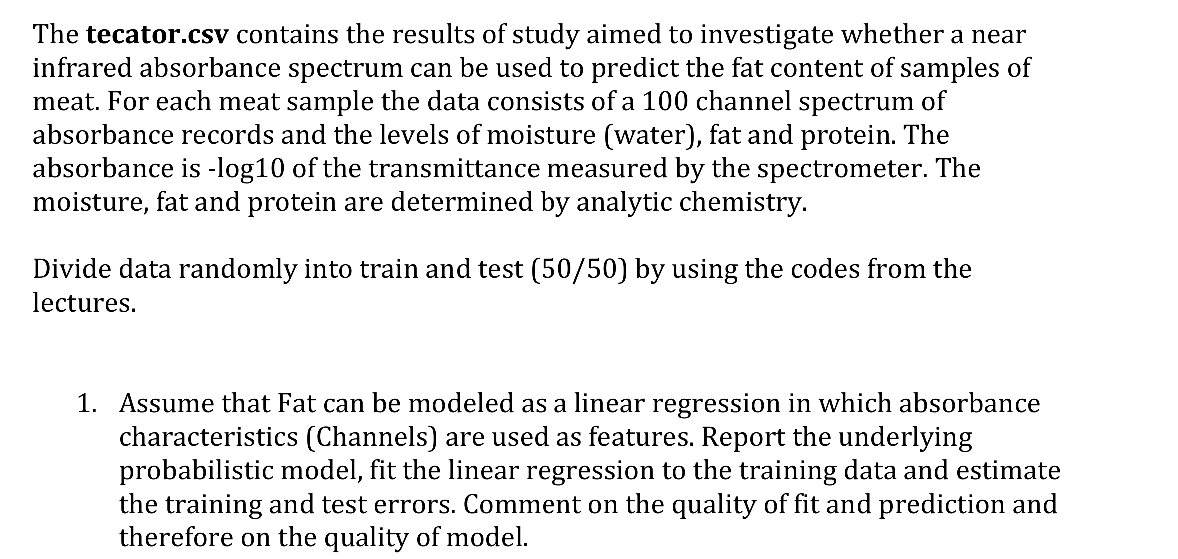


## 3.1

The underlying problistic model is a linear regression model with the distribution $$y \sim N (w^T\mathcal{X}, \, \sigma^2)$$

* y is a vector of the response variable "Fat" 
* $w^T$ is a vector of the regression parameters 
* $\mathcal{X}$ is a matrix of the observed values for the independent variables used in the model which are the fat channels
* $\sigma^2$ is a scalar that denotes the variance of the features.

In [1]:
tecator = read.csv('tecator.csv')
n = dim(tecator)[1]

In [2]:
head(tecator)

Sample,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,...,Channel94,Channel95,Channel96,Channel97,Channel98,Channel99,Channel100,Fat,Protein,Moisture
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,...,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5,16.7,60.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,...,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1,13.5,46.0
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,...,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4,20.5,71.0
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,...,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9,20.7,72.8
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,...,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5,15.5,58.3
6,3.00993,3.01540,3.02086,3.02634,3.03190,3.03756,3.04341,3.04955,3.05599,...,3.53442,3.52221,3.50972,3.49682,3.48325,3.46870,3.45307,42.7,13.7,44.0


In [3]:
ind = sample(n,floor(n*0.5),replace = FALSE)

In [61]:
train_data =  tecator[ind,]
test_data = tecator[-ind,]

In [62]:
train = train_data[,-c(1,103,104)]
test = test_data[,-c(1,103,104)]
ytrain = train$Fat
ytest = test$Fat

In [63]:
X = train_data[,-c(1,102,103,104)]
head(X,1)

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,...,Channel91,Channel92,Channel93,Channel94,Channel95,Channel96,Channel97,Channel98,Channel99,Channel100
166,3.28923,3.29435,3.29952,3.30482,3.31024,3.31584,3.32175,3.32799,3.33462,3.34161,...,3.82507,3.80137,3.77789,3.75457,3.73154,3.70883,3.68601,3.66249,3.63866,3.61474


In [15]:
fit_lm = lm( Fat ~., data = train)

In [16]:
summary(fit_lm)


Call:
lm(formula = Fat ~ ., data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034606 -0.006199  0.000542  0.006229  0.028657 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.303e+01  4.250e-01  30.659 7.99e-08 ***
Channel1    -4.423e+03  6.153e+02  -7.189 0.000366 ***
Channel2    -8.902e+03  6.581e+02 -13.526 1.01e-05 ***
Channel3     5.780e+04  1.775e+03  32.569 5.57e-08 ***
Channel4    -2.025e+04  3.209e+03  -6.310 0.000740 ***
Channel5    -1.006e+05  3.422e+03 -29.390 1.03e-07 ***
Channel6     1.319e+05  3.450e+03  38.225 2.14e-08 ***
Channel7    -1.028e+05  2.715e+03 -37.884 2.26e-08 ***
Channel8     7.187e+04  2.061e+03  34.873 3.70e-08 ***
Channel9    -4.419e+04  1.782e+03 -24.801 2.83e-07 ***
Channel10   -4.987e+03  2.387e+03  -2.089 0.081665 .  
Channel11    3.044e+04  2.357e+03  12.912 1.33e-05 ***
Channel12    1.570e+04  3.775e+03   4.158 0.005960 ** 
Channel13   -1.329e+04  3.668e+03  -3.624 0.011048 *  
Cha

## Estimating the error on trainig set:

In [17]:
pred_ytrain = predict(fit_lm)
Mse_train = mean((ytrain - pred_ytrain)**2)
Mse_train

[1] 0.0001146898

In [110]:
head(test,1)

Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,...,Channel92,Channel93,Channel94,Channel95,Channel96,Channel97,Channel98,Channel99,Channel100,Fat
2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.8596,2.8394,2.8192,22.5


# Estimating the error on test set:

In [20]:
pred_ytest = predict(fit_lm,test)
Mse_test = mean((ytest - pred_ytest)**2) 
Mse_test

[1] 647.1208

With the very low training MSE and comparably high test MSE we have reason to believe that there is overfitting occurring with the model. From viewing the summary for the training model it was found to give a adjusted R-square of 9.59e-15 which gives an clear indication that the model is overfit.

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

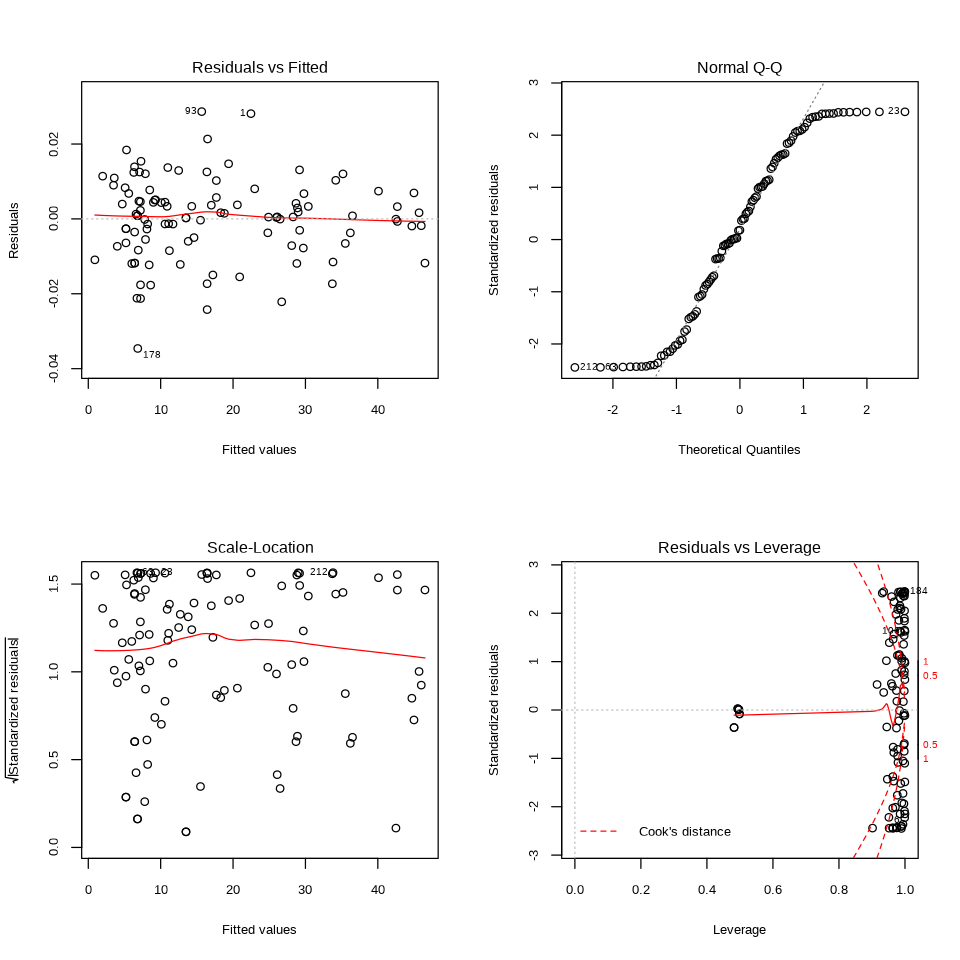

In [44]:
# Plotting the linear regression model

par(mfrow = c(2,2))

plot(fit_lm)


Analyzing the plots we find that the assumption that the model residuals are i.i.d does seems to be fulfilled. From the residual vs fitted plot it can be observed that the assumption for constant variance is not fulfilled with a wider spread on the left hand side compared to the right hand side. It's clear that the residuals do not follow anything similar to a normal distribution with mean 0 and constant variance when observing the QQ-plot. Hence the assumptions for the model are not fulfilled so we should not draw any conclusions from the model.

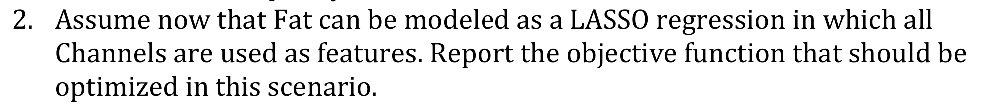

The function we are looking to optimize in this case is loss function of the LASSO model.


$$\sum\limits_{i=1}^N{(y_i - \mathbb{X}_i\boldsymbol{\beta})^2} + \lambda\sum\limits_{j=1}^p{|\beta_j|}$$

Where $N$ is the number of observations and $\mathbb{X}$ is the matrix of features and $y$ is the dependent variable. $\beta$ are the parameters that the shrinkage function will choose so that the loss function minimizes. With $\lambda$ being the shrinkage parameter and P the number of features. Where the chosen $\lambda$ will shrink the $\beta$ parameters. 


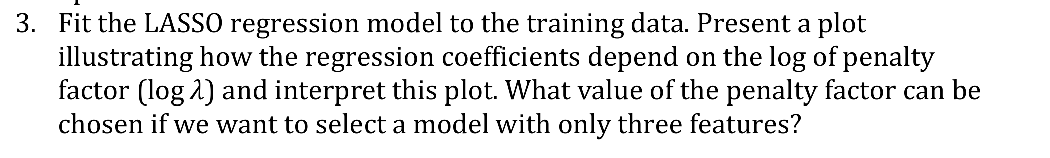

In [153]:
library(glmnet)

In [154]:
set.seed(12345)
lasso_model = glmnet(as.matrix(X), ytrain, alpha=1,family="gaussian")
# TO  select the model with 3 feature the degree of freedom should be 3
lasso_model$lambda[which(lasso_model$df == 3)]

[1] 0.9511756 0.7896827 0.7195295 0.6556085

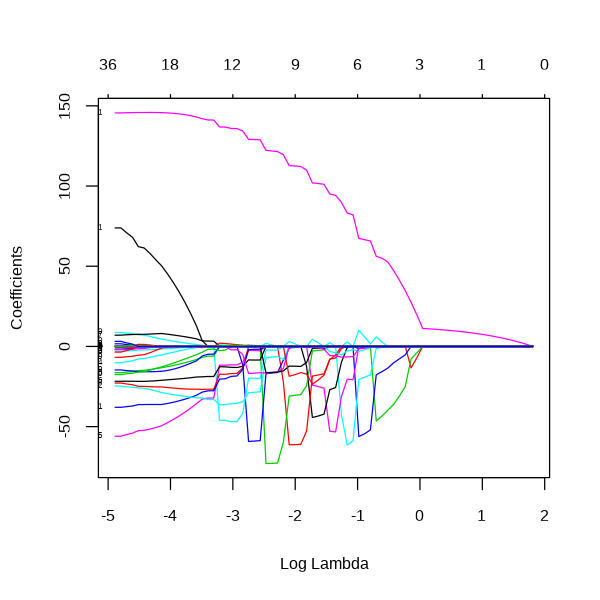

In [155]:
plot(lasso_model,xvar = "lambda",label = TRUE)


From the plot we can see that where the function converges to 3 features that have non zero coefficients is approximately at $\lambda = 0.72$ Each curve corresponds to a variable. It shows the path of its coefficient against the ℓ1-norm of the whole coefficient vector as λ varies. The axis above indicates the number of nonzero coefficients at the current λ, which is the effective degrees of freedom (df) for the lasso.


In [175]:
print(lasso_model)


Call:  glmnet(x = as.matrix(X), y = ytrain, family = "gaussian", alpha = 1) 

      Df    %Dev   Lambda
 [1,]  0 0.00000 6.114000
 [2,]  1 0.04190 5.571000
 [3,]  1 0.07668 5.076000
 [4,]  1 0.10560 4.625000
 [5,]  1 0.12950 4.214000
 [6,]  1 0.14940 3.840000
 [7,]  1 0.16600 3.499000
 [8,]  1 0.17970 3.188000
 [9,]  1 0.19110 2.905000
[10,]  1 0.20050 2.647000
[11,]  1 0.20840 2.412000
[12,]  1 0.21490 2.197000
[13,]  1 0.22030 2.002000
[14,]  1 0.22480 1.824000
[15,]  1 0.22850 1.662000
[16,]  1 0.23160 1.515000
[17,]  1 0.23420 1.380000
[18,]  1 0.23630 1.257000
[19,]  1 0.23810 1.146000
[20,]  1 0.23960 1.044000
[21,]  3 0.34100 0.951200
[22,]  4 0.42560 0.866700
[23,]  3 0.49690 0.789700
[24,]  3 0.55560 0.719500
[25,]  3 0.60430 0.655600
[26,]  4 0.64470 0.597400
[27,]  5 0.67860 0.544300
[28,]  5 0.70670 0.495900
[29,]  7 0.73610 0.451900
[30,]  9 0.76280 0.411700
[31,]  9 0.78540 0.375200
[32,]  6 0.80690 0.341800
[33,]  8 0.82250 0.311500
[34,]  7 0.83630 0.283800
[35,]  8 0.

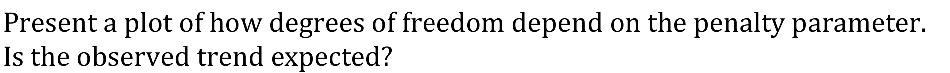

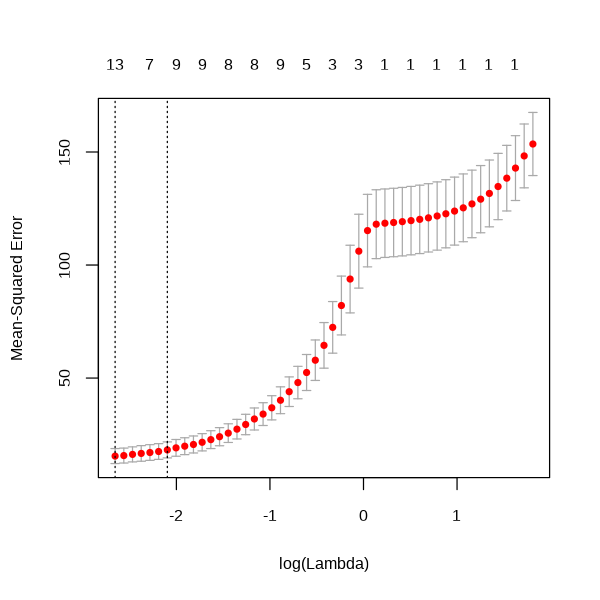

In [178]:
options(repr.plot.width=5, repr.plot.height=5)
lasso_model2=cv.glmnet(x = as.matrix(X),y = ytrain)
plot(lasso_model2)

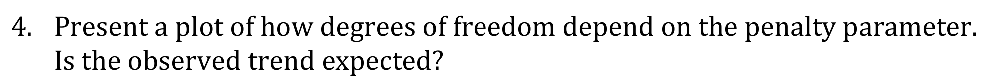

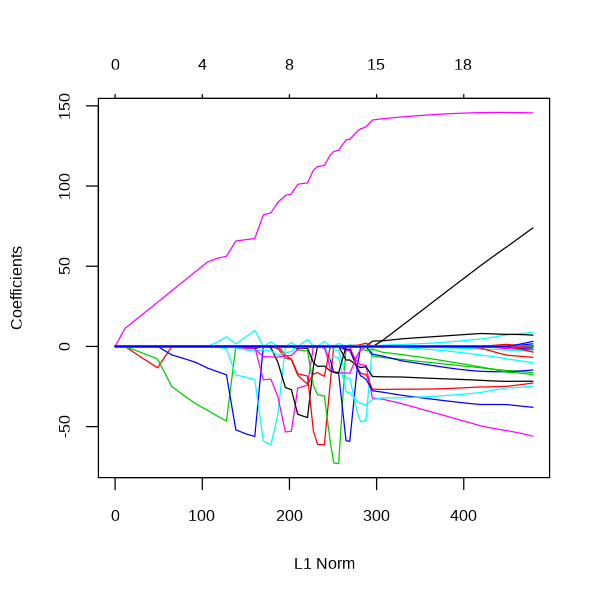

In [151]:
plot(lasso_model)

The axis above shows the degree of freedom.
The graph shows that as the value of the shrinkage parameter lambda increases it reduces the number of features in the model. Which is exactly as expected from the given function with an sufficiently large $\lambda$ it will reduce the number of features included to 0 as such decreasing the degrees of freedom. 

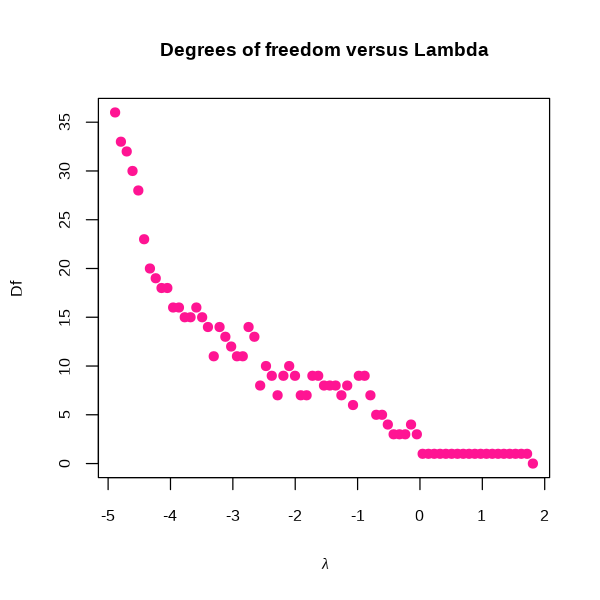

In [149]:
options(repr.plot.width=5, repr.plot.height=5)
plot(x=log(lasso_model$lambda),y=lasso_model$df,xlab = expression(lambda),
ylab = "Df",main = "Degrees of freedom versus Lambda",pch=19,col='deeppink')


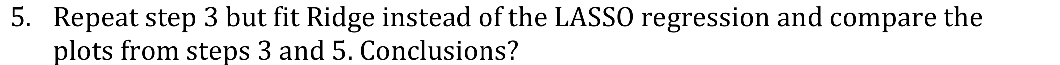

In [166]:
set.seed(12345)
ridge_model = glmnet(as.matrix(X), ytrain, alpha=0,family="gaussian")
# TO  select the model with 3 feature the degree of freedom should be 3


numeric(0)

In [167]:
#the  ridge regression always uses all the features
ridge_model$df

[1] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[20] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[39] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[58] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[77] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[96] 100

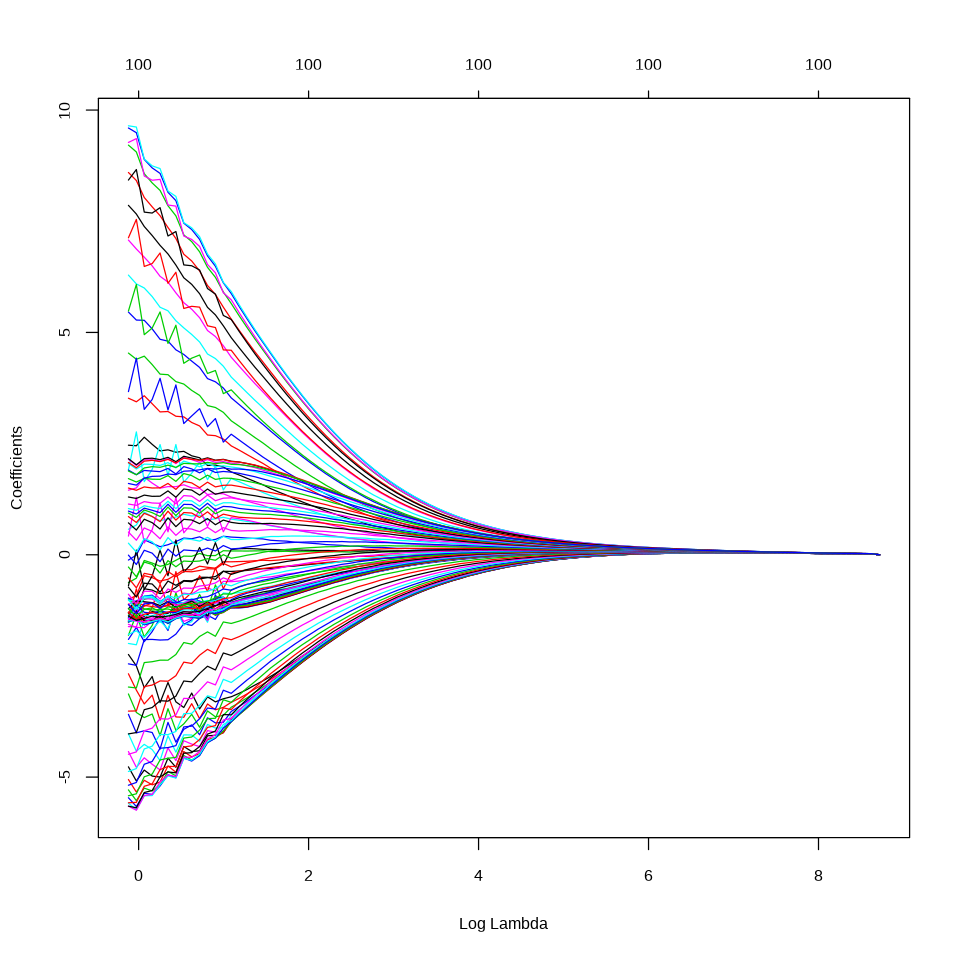

In [170]:
options(repr.plot.width=8, repr.plot.height=8)

plot(ridge_model,xvar = "lambda")

As seen in the graphs the lasso function will converge the coefficients of the model to 0 whereas the ridge regression model will reduce the coefficients close to zero but never to zero.

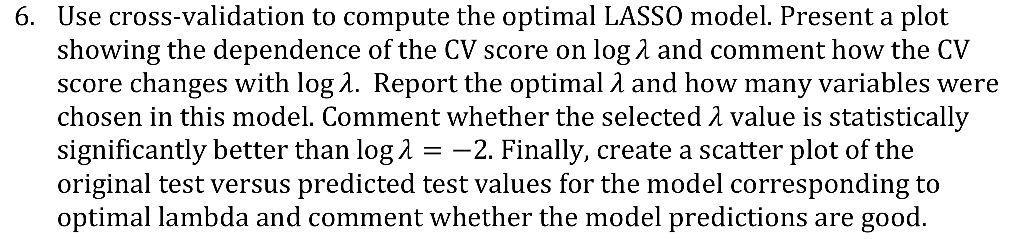

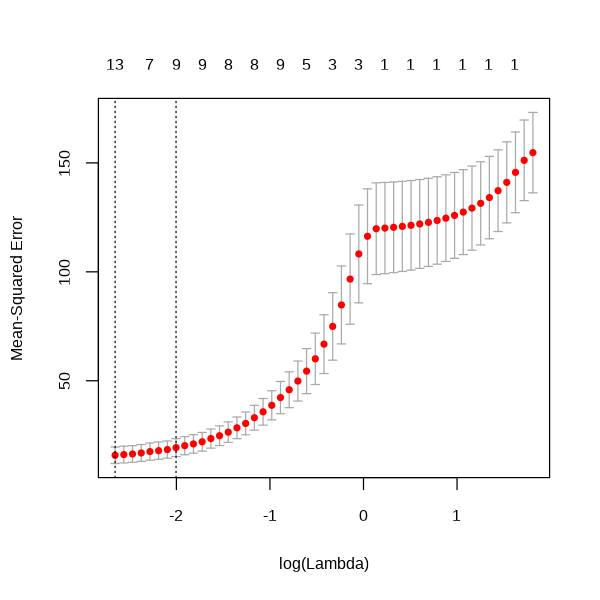

In [180]:
fat_lasso_cv <- cv.glmnet(as.matrix(X),ytrain,alpha = 1)
plot(fat_lasso_cv)


As the $log(\lambda)$ increases the MSE will increase with a non-linear increase until approximately $log(\lambda)$ reaches 0 and then where it will slowdown the increasing rate of MSE.

This plots the cross-validation curve (red dotted line) along with upper and lower standard deviation curves along the λ sequence (error bars). Two special values along the λ sequence are indicated by the vertical dotted lines. lambda.min is the value of λ that gives minimum mean cross-validated error, while lambda.1se is the value of λ that gives the most regularized model such that the cross-validated error is within one standard error of the minimum.From the cross-validation (CV) plot with the help of the black horizontal line where it goes from the upper bound of the confidence interval of the MSE for optimal lambda. Since the black line crosses within the confidence interval of the $log(\lambda) = -2$, which means that it's not possible to conclude that the optimal lambda is significantly better than the $log(\lambda) = -2$.

In [181]:
print(fat_lasso_cv)



$lambda
 [1] 6.11422643 5.57105540 5.07613820 4.62518807 4.21429911 3.83991239
 [7] 3.49878516 3.18796273 2.90475291 2.64670266 2.41157689 2.19733905
[13] 2.00213350 1.82426948 1.66220641 1.51454057 1.37999296 1.25739819
[19] 1.14569440 1.04391407 0.95117562 0.86667580 0.78968271 0.71952948
[25] 0.65560846 0.59736601 0.54429766 0.49594376 0.45188548 0.41174122
[31] 0.37516327 0.34183479 0.31146713 0.28379725 0.25858549 0.23561346
[37] 0.21468221 0.19561044 0.17823295 0.16239922 0.14797212 0.13482669
[43] 0.12284906 0.11193548 0.10199144 0.09293081 0.08467509 0.07715279
[49] 0.07029875

$cvm
 [1] 154.72060 151.18292 145.66367 141.07516 137.25993 134.08720 131.44835
 [8] 129.25318 127.42672 125.90675 124.64154 123.58813 122.71083 121.97998
[15] 121.37095 120.86324 120.43985 120.08661 119.79179 116.32433 108.21434
[22]  96.66994  84.80083  74.94253  66.80893  60.07973  54.41838  49.87611
[29]  45.88040  42.29299  38.73500  35.74603  33.04075  30.41868  28.39343
[36]  26.40816  24.78635  2

In [188]:
lasso3_6_opt <- glmnet(x = as.matrix(X), y = ytrain, alpha = 1, lambda = fat_lasso_cv$lambda.min)


In [189]:
lasso3_6_opt


Call:  glmnet(x = as.matrix(X), y = ytrain, alpha = 1, lambda = fat_lasso_cv$lambda.min) 

     Df   %Dev Lambda
[1,] 11 0.9235 0.0703

since $ df= 11$ ,  

11 features have been used in the optimal model

#### original test vs MSE test

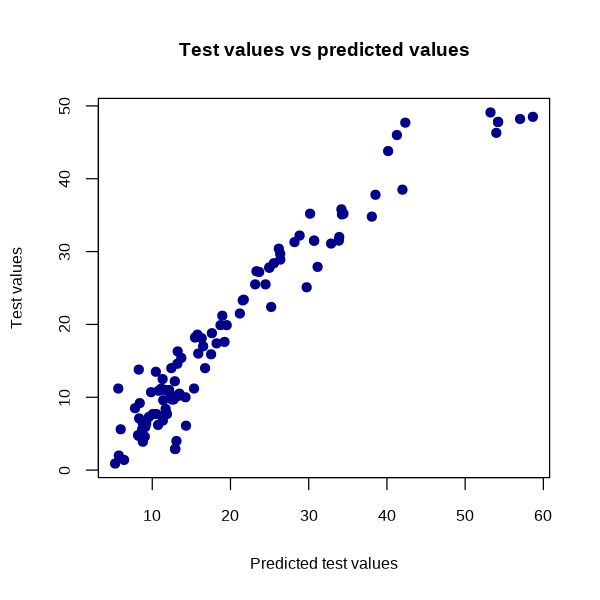

In [190]:
fat_lasso_cv_preds <- predict(fat_lasso_cv,
newx = as.matrix(test[,1:100]),
s = "lambda.min")
plot(x = fat_lasso_cv_preds,y = test$Fat,
xlab = "Predicted test values",
ylab = "Test values",
main = "Test values vs predicted values",pch=19,col='darkblue')

From observing the plot we can say that the predictions are a decent estimate( at least for lower levels of Fat) as a perfect fit would results in
a diagonal line over the graph. There seems to be a approximately linear trend between the predictions and
true value. The
correlation between the predicted values and the true values is 0.96. It can be seen that as Fat levels increase
there is a slight curve to the slope of the points, as the model predicts too high levels of fat. As an example
of this there are 5 points predicted to have a fat level between 50 and 60 while in reality these observations
all had levels below 50.


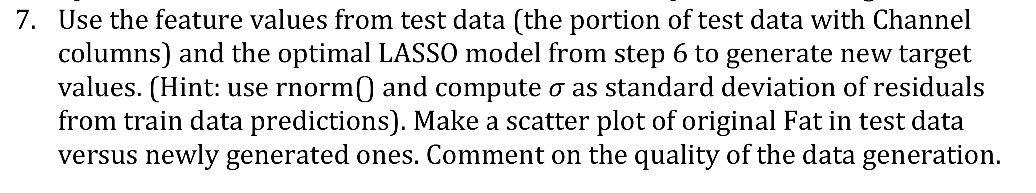

In [198]:
res = predict(lasso3_6_opt,newx = as.matrix(X))
sig = sd(res - ytrain)
sig

[1] 3.420079

In [202]:
head(test[,1:100])

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,...,Channel91,Channel92,Channel93,Channel94,Channel95,Channel96,Channel97,Channel98,Channel99,Channel100
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753
9,3.27336,3.27996,3.28646,3.29300,3.29956,3.30627,3.31310,3.32006,3.32727,3.33472,...,3.84916,3.82620,3.80355,3.78118,3.75899,3.73709,3.71543,3.69395,3.67259,3.65127
10,3.39805,3.40539,3.41271,3.42001,3.42735,3.43479,3.44245,3.45035,3.45838,3.46665,...,3.98173,3.95779,3.93407,3.91059,3.88728,3.86413,3.84107,3.81811,3.79531,3.77262
11,3.00881,3.01401,3.01934,3.02469,3.03022,3.03601,3.04208,3.04849,3.05534,3.06260,...,3.54178,3.53029,3.51872,3.50678,3.49431,3.48107,3.46677,3.45126,3.43478,3.41792


In [209]:
mu = predict(lasso3_6_opt,newx=as.matrix(test[,1:100]))
generated_data=rnorm(n=108,mean = mu,sd = sig)

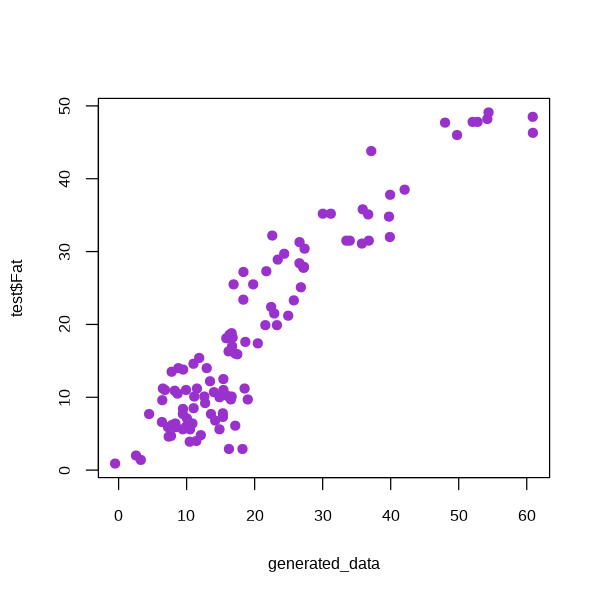

In [218]:
plot(y=test$Fat,x=generated_data,pch=19,col = 'darkorchid')

The generated data has a larger spread than the predicted data which is reasonable with the noise included from the residuals. The generated data it self is not good as it comes from a discriminative model instead of a generative model which would produce more random outcomes for the target values. Which is why the generated data closely follows the same distribution as the observed with increased variance.

______________________________________________________________________________________________